<a href="https://colab.research.google.com/github/ryogrid/ryogridJupyterNotebooks/blob/master/gaussian_process_regression_sample_org_0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
 
def exponential_cov(x, y, params):
  return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [0]:
def conditional(x_new, x, y, params):
  B = exponential_cov(x_new, x, params)
  C = exponential_cov(x, x, params)
  A = exponential_cov(x_new, x_new, params)

  mu = np.linalg.inv(C).dot(B.T).T.dot(y)
  sigma = A - B.dot(np.linalg.inv(C).dot(B.T))

  return(mu.squeeze(), sigma.squeeze())

<ErrorbarContainer object of 3 artists>

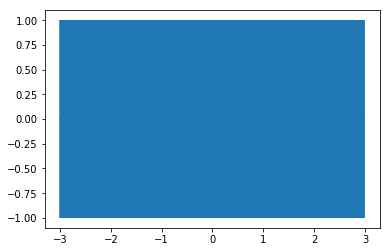

In [3]:
import matplotlib.pylab as plt
 
theta = [1, 10]
sigma_theta = exponential_cov(0, 0, theta)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sigma_theta, capsize=0)

In [18]:
x = [1.]
y = [np.random.normal(scale=sigma_theta)]
y

[0.3687937514053605]

In [0]:
sigma_1 = exponential_cov(x, x, theta)
 
def predict(x, data, kernel, params, sigma, t):
  k = [kernel(x, y, params) for y in data]
  Sinv = np.linalg.inv(sigma)
  y_pred = np.dot(k, Sinv).dot(t)
  sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
  return y_pred, sigma_new

In [0]:
x_pred = np.linspace(-3, 3, 100)
predictions = [predict(i, x, exponential_cov, theta, sigma_1, y) for i in x_pred]

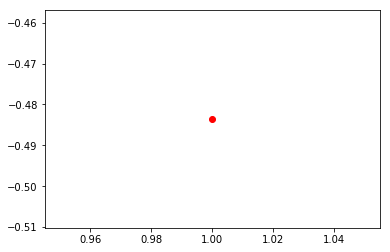

In [7]:
y_pred, sigmas = np.transpose(predictions)
#plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [8]:
m, s = conditional([-0.7], x, y, theta)
y2 = np.random.normal(m, s)
y2

0.6824750664074756

In [0]:
x.append(-0.7)
y.append(y2)
 
sigma_2 = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sigma_2, y) for i in x_pred]

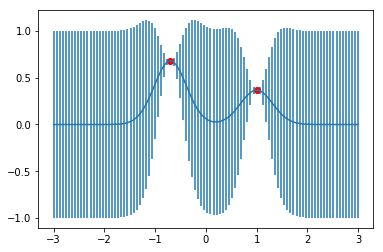

In [21]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [22]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, theta)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([ 0.14457513, -0.56748689, -0.11960339,  0.71469824,  0.2201649 ])

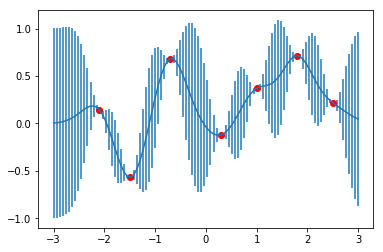

In [23]:
x += x_more
y += y_more.tolist()
 
sigma_new = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sigma_new, y) for i in x_pred]
 
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

以下はオリジナルで追加したコード。sin波の学習ができるか試している

berow param shows nice fitting

In [0]:
x0 = np.arange(0, 10, 0.5)
y0 = np.sin(x0)
theta2 = [1, 10]
x_pred2 = np.linspace(0, 10, 100)

In [0]:
def exponential_cov2(x, y, params):
  return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [0]:
def predict2(x, data, kernel, params, sigma, t):
  #print(len(sigma))
  k = [kernel(x, y, params) for y in data]
  Sinv = np.linalg.inv(sigma)
  #print(Sinv)
  y_pred = np.dot(k, Sinv).dot(t)
  sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
  #print(len(sigma_new))
  return y_pred, sigma_new

20
20
20
100
100


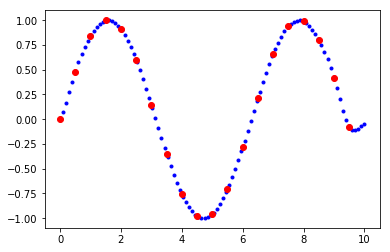

In [39]:
sigma_sin = exponential_cov2(x0, x0, theta2)
print(len(x0))
print(len(y0))
print(len(sigma_sin))
predictions = [predict2(i, x0, exponential_cov, theta2, sigma_sin, y0) for i in x_pred2]
 
y_pred2, sigmas = np.transpose(predictions)
print(len(x_pred2))
print(len(y_pred2))
#plt.errorbar(x_pred2, y_pred, yerr=sigmas, capsize=0)
plt.plot(x_pred2, y_pred2, "b.")
plt.plot(x0, y0, "ro")

prediction not works

In [0]:
x0 = np.arange(0, 10, 0.5)
y0 = np.sin(x0)
theta2 = [1, 10]
x_pred2 = np.linspace(0, 20, 200)

20
20
20
200
200


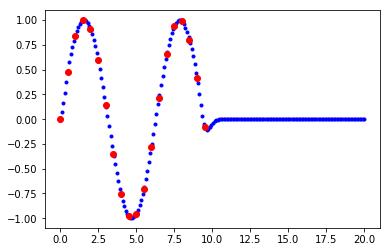

In [41]:
sigma_sin = exponential_cov2(x0, x0, theta2)
print(len(x0))
print(len(y0))
print(len(sigma_sin))
predictions = [predict2(i, x0, exponential_cov, theta2, sigma_sin, y0) for i in x_pred2]
 
y_pred2, sigmas = np.transpose(predictions)
print(len(x_pred2))
print(len(y_pred2))
#plt.errorbar(x_pred2, y_pred, yerr=sigmas, capsize=0)
plt.plot(x_pred2, y_pred2, "b.")
plt.plot(x0, y0, "ro")